In [1]:
import pandas as pd
import numpy as np

energy = pd.read_excel('En_In.xls', skiprows=18, skipfooter=38, usecols=[2, 3, 4, 5], names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])

energy.replace('...', np.nan, inplace=True)
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce') * 1000000

country_rename = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'].replace(country_rename, inplace=True)

energy['Country'] = energy['Country'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()

pd.set_option('display.float_format', '{:.2f}'.format)

result = energy[energy['Country'].isin(['Ukraine', 'American Samoa', 'Micronesia'])]
print(result)

            Country  Energy Supply  Energy Supply per Capita  % Renewable
2    American Samoa            NaN                       NaN         0.64
132      Micronesia     2000000.00                     21.00         2.94
211         Ukraine  4844000000.00                    107.00         8.07


In [2]:
gdp = pd.read_csv('gpd.csv', skiprows=4)

gdp_rename = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp['Country Name'].replace(gdp_rename, inplace=True)

gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.61,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4018195653.51,4021331428.40,3675727910.51,3535389132.60,3346317328.52,3185604581.52,3129537611.89,3127549907.58,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,10305228125.14,11721187594.21,12144482858.18,14697331940.65,15936800636.25,16911126453.23,19352203805.63,19731337260.64,19990317160.68,20294152243.01
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,55811028114.65,68420444001.50,77874196512.18,79753199398.14,82470913120.73,85702615836.44,90120963241.22,96261432368.26,100886286610.96,103910558934.02
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9771760095.13,10348293941.59,11127520474.30,11500292411.17,11926953258.92,12231090567.67,12404772053.50,12542465022.37,12793314322.82,13120823169.48


In [3]:
scimagojr = pd.read_excel('scimagojr.xlsx')

scimagojr = scimagojr.drop_duplicates('Country')

merged_df = pd.merge(scimagojr, energy, how='inner', left_on='Country', right_on='Country')
merged_df = pd.merge(merged_df, gdp, how='inner', left_on='Country', right_on='Country Name')

columns_to_keep = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                   'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                   '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

final_df = merged_df.head(15)[columns_to_keep].set_index('Country')

display(final_df)

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000.00,93.00,19.75,3992331462570.89,4559041383517.93,4997775145605.96,5459247267275.14,6039658508485.59,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28
China,1,127050,126767,597237,411683,4.70,138,585000000.00,82.00,0.00,3992331462570.89,4559041383517.93,4997775145605.96,5459247267275.14,6039658508485.59,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28
China,1,127050,126767,597237,411683,4.70,138,47000000.00,83.00,0.00,3992331462570.89,4559041383517.93,4997775145605.96,5459247267275.14,6039658508485.59,6612490294273.65,7124977970399.61,7672447738017.42,8230120617793.52,8797998940421.28
Japan,3,30504,30287,223024,61554,7.31,134,18984000000.00,149.00,10.23,5496541517363.31,5617035943770.73,5558526873313.82,5251308399909.32,5498717815809.77,5473738114222.05,5569101602926.18,5644658523313.42,5642884448582.19,5669563143140.97
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000.00,214.00,17.29,1385792607182.58,1504071117741.30,1583004071092.11,1459199142720.26,1524917468442.01,1589942641764.29,1645875899596.27,1666934123163.16,1678708855070.86,1616148858033.77
Canada,6,17899,17620,215003,40930,12.01,149,10431000000.00,296.00,61.95,1564468853329.45,1596739898466.32,1612713061250.24,1565144676082.31,1613406134731.12,1664086754804.89,1693132927878.08,1730687770724.13,1773485821199.77,1792608764608.81
Germany,7,17027,16831,140566,27426,8.26,126,13261000000.00,165.00,17.90,3332890754966.89,3441560834437.09,3478809377483.44,3283339933774.83,3417298013245.03,3542371125827.81,3556723774834.44,3567317390728.48,3624386278145.70,3685555907284.77
India,8,15005,14841,128763,37209,8.58,115,33195000000.00,26.00,14.97,1265894322131.09,1374865195244.50,1428360609657.80,1549482541544.70,1708458876829.92,1821872415623.62,1924235460945.25,2051981849791.69,2200616575310.97,2367206118959.06
France,9,13153,12973,130632,28601,9.93,114,10597000000.00,166.00,17.02,2607839735099.34,2669423841059.60,2674637086092.71,2595966887417.22,2646994701986.75,2702031788079.47,2706968211920.53,2722566887417.22,2729631788079.47,2761185430463.58


In [4]:
def average_gdp_last_10_years(dataframe):
    gdp_columns = [str(year) for year in range(2006, 2016)]
    
    average_gdp_series = dataframe[gdp_columns].mean(axis=1, skipna=True)
    
    result_series = average_gdp_series.sort_values(ascending=False)
    
    return result_series

average_gdp_result = average_gdp_last_10_years(final_df)

print(average_gdp_result)

Country
China                6348608932836.10
China                6348608932836.10
China                6348608932836.10
Japan                5542207638235.18
Germany              3493025339072.85
France               2681724635761.59
Brazil               2189794143774.91
Italy                2120175089933.78
India                1769297396603.86
Canada               1660647466307.51
Russian Federation   1565459478480.66
Spain                1418078278145.69
Australia            1164042729991.43
South Korea          1106714508244.85
Iran                  444155754051.09
dtype: float64


In [5]:
def gdp_change_for_5th_country(dataframe):
    average_gdp_series = average_gdp_last_10_years(dataframe)
    fifth_country = average_gdp_series.index[4]  

    gdp_change = dataframe.loc[fifth_country, '2015'] - dataframe.loc[fifth_country, '2006']

    return (fifth_country, gdp_change)

gdp_change_result = gdp_change_for_5th_country(final_df)

print(gdp_change_result)

('Germany', 352665152317.8799)


In [6]:
def max_renewable_percentage(dataframe):
    max_renewable_country = dataframe['% Renewable'].idxmax()
    max_renewable_percentage = dataframe.loc[max_renewable_country, '% Renewable']

    return (max_renewable_country, max_renewable_percentage)

max_renewable_result = max_renewable_percentage(final_df)

print(max_renewable_result)

('Brazil', 69.64803)


In [7]:
def population_estimate(dataframe):
    dataframe['Population Estimate'] = dataframe['Energy Supply'] / dataframe['Energy Supply per Capita']
    
    sixth_population_country = dataframe.sort_values('Population Estimate', ascending=False).index[5]
    sixth_population_estimate = dataframe.loc[sixth_population_country, 'Population Estimate']

    return (sixth_population_country, sixth_population_estimate)

population_estimate_result = population_estimate(final_df)

print(population_estimate_result)

('Germany', 80369696.96969697)


In [8]:
def citation_per_capita_correlation(dataframe):
    dataframe['Citations per Capita'] = dataframe['Citations'] / (dataframe['Energy Supply'] / dataframe['Energy Supply per Capita'])
    
    correlation_value = dataframe['Citations per Capita'].corr(dataframe['Energy Supply per Capita'])

    return correlation_value

correlation_result = citation_per_capita_correlation(final_df)

print(correlation_result)

-0.23110666654986844


In [9]:
def renewable_above_median(dataframe):
    renewable_median = dataframe['% Renewable'].median()
    
    dataframe['Above Median'] = (dataframe['% Renewable'] >= renewable_median).astype(int)
    
    result_series = dataframe.sort_values('Rank')['Above Median']
    
    return result_series

renewable_above_median_result = renewable_above_median(final_df)

print(renewable_above_median_result)

Country
China                 1
China                 0
China                 0
Japan                 0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Above Median, dtype: int32


In [10]:
import pandas as pd

ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

data = {
    'Country': final_df.index,
    'Population Estimate': final_df['Population Estimate'],
    'Continent': [ContinentDict[country] for country in final_df.index]
}
population_df = pd.DataFrame(data)

grouped_df = population_df.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])

grouped_df.columns = ['size', 'sum', 'mean', 'std']

display(grouped_df)

,size,sum,mean,std
Continent,,,,
Asia,7,2906366798.01,415195256.86,621622961.77
Australia,1,23316017.32,23316017.32,NaN
Europe,5,394058699.47,78811739.89,38132276.15
North America,1,35239864.86,35239864.86,NaN
South America,1,205915254.24,205915254.24,NaN


C:\Users\levko\AppData\Local\Temp\ipykernel_5448\2977939900.py:34: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  scatter_plot = sns.scatterplot(x='% Renewable', y='Rank', size='GDP', sizes=(20, 800), hue='Continent', data=bubble_df,


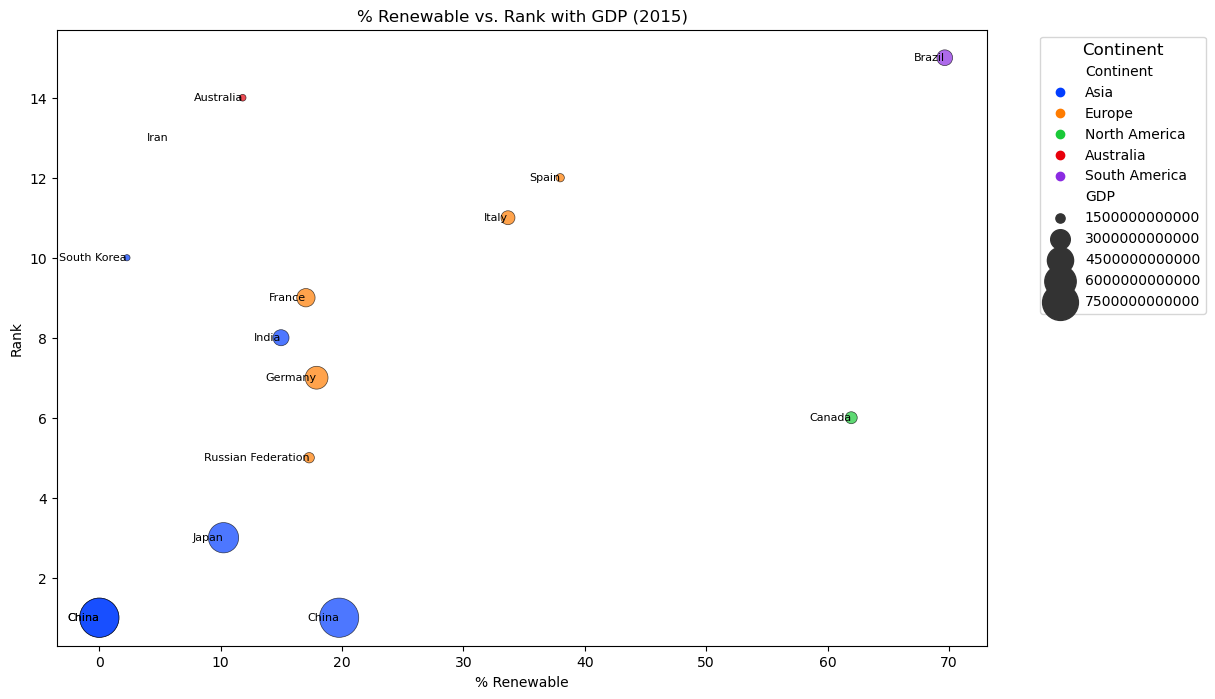

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

data = {
    'Country': final_df.index,
    'Rank': final_df['Rank'],
    '% Renewable': final_df['% Renewable'],
    'GDP': final_df['2015'],
    'Continent': [ContinentDict[country] for country in final_df.index]
}
bubble_df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 8))

scatter_plot = sns.scatterplot(x='% Renewable', y='Rank', size='GDP', sizes=(20, 800), hue='Continent', data=bubble_df,
                               palette=sns.color_palette("bright"), alpha=0.7, edgecolor='k', linewidth=0.5)

for country, x, y in zip(bubble_df['Country'], bubble_df['% Renewable'], bubble_df['Rank']):
    plt.text(x, y, country, fontsize=8, ha='right', va='center')

legend = plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.setp(legend.get_title(), fontsize='12')
plt.xlabel('% Renewable')
plt.ylabel('Rank')
plt.title('% Renewable vs. Rank with GDP (2015)')

plt.show()